# **Загрузка**

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
%cd /content/drive/My Drive/CSV

/content/drive/My Drive/CSV


In [4]:
data = pd.read_csv('covid-19cases.csv', usecols=range(1,46))

In [5]:
data.info(null_counts = 1) 
print('\nКоличество повторяющихся строк —', data.duplicated().sum())
display(data.head())

<ipython-input-5-3ea0a8221200>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  data.info(null_counts = 1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105748 entries, 0 to 105747
Data columns (total 45 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   date                             105748 non-null  object 
 1   continent                        52269 non-null   object 
 2   location                         52873 non-null   object 
 3   total_cases                      49259 non-null   float64
 4   new_cases                        51979 non-null   float64
 5   new_cases_smoothed               51185 non-null   float64
 6   total_deaths                     40323 non-null   float64
 7   new_deaths                       51979 non-null   float64
 8   new_deaths_smoothed              51185 non-null   float64
 9   total_cases_per_million          48993 non-null   float64
 10  new_cases_per_million            51915 non-null   float64
 11  new_cases_smoothed_per_million   51120 non-null   float64
 12  to

,date,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,Unnamed: 40,Unnamed: 41,iso_code,month,year
0,13-03-20,North America,Aruba,2.0,2.0,NaN,NaN,0.0,NaN,18.733,...,NaN,NaN,NaN,76.29,NaN,NaN,NaN,ABW,3.0,20.0
1,For Notes:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19-03-20,North America,Aruba,NaN,NaN,0.286,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,76.29,NaN,NaN,NaN,ABW,3.0,20.0
3,For Notes:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20-03-20,North America,Aruba,4.0,2.0,0.286,NaN,0.0,0.0,37.465,...,NaN,NaN,NaN,76.29,NaN,NaN,NaN,ABW,3.0,20.0


# **Предобработка**

In [6]:
data_cleaned  = data.drop (['Unnamed: 40', 'Unnamed: 41'], axis=1)

In [7]:
len(data_cleaned[data_cleaned.date.apply(lambda x: re.search('\d', x)).isna()==True])

52875

In [8]:
data_cleaned = data_cleaned.drop(data_cleaned[data_cleaned.date.apply(lambda x: re.search('\d', x)).isna()==True].index)

In [9]:
105748 - 52875

52873

In [10]:
data_cleaned.info(null_counts =1) 
print('\nКоличество повторяющихся строк —', data_cleaned.duplicated().sum())
display(data_cleaned.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52873 entries, 0 to 105746
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   date                             52873 non-null  object 
 1   continent                        52269 non-null  object 
 2   location                         52873 non-null  object 
 3   total_cases                      49259 non-null  float64
 4   new_cases                        51979 non-null  float64
 5   new_cases_smoothed               51185 non-null  float64
 6   total_deaths                     40323 non-null  float64
 7   new_deaths                       51979 non-null  float64
 8   new_deaths_smoothed              51185 non-null  float64
 9   total_cases_per_million          48993 non-null  float64
 10  new_cases_per_million            51915 non-null  float64
 11  new_cases_smoothed_per_million   51120 non-null  float64
 12  total_deaths_per_

<ipython-input-10-1b166cfce00b>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  data_cleaned.info(null_counts =1)


,date,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,iso_code,month,year
0,13-03-20,North America,Aruba,2.0,2.0,NaN,NaN,0.0,NaN,18.733,...,11.62,NaN,NaN,NaN,NaN,76.29,NaN,ABW,3.0,20.0
2,19-03-20,North America,Aruba,NaN,NaN,0.286,NaN,NaN,0.0,NaN,...,11.62,NaN,NaN,NaN,NaN,76.29,NaN,ABW,3.0,20.0
4,20-03-20,North America,Aruba,4.0,2.0,0.286,NaN,0.0,0.0,37.465,...,11.62,NaN,NaN,NaN,NaN,76.29,NaN,ABW,3.0,20.0
6,21-03-20,North America,Aruba,NaN,NaN,0.286,NaN,NaN,0.0,NaN,...,11.62,NaN,NaN,NaN,NaN,76.29,NaN,ABW,3.0,20.0
8,22-03-20,North America,Aruba,NaN,NaN,0.286,NaN,NaN,0.0,NaN,...,11.62,NaN,NaN,NaN,NaN,76.29,NaN,ABW,3.0,20.0


# **Расчёты**

In [11]:
# Построение графиков
def draw_chart(data, kind, data_y=None, data_x=None, title=None, xlabel=None, ylabel = None
               , height=None, width=None
               , vmax=None, fmt=None, color = None, color_name=None):
     # Тепловая карта     
    if kind == 'heatmap':
        sns.set(style='white')
        plt.figure(figsize=(16, 9)) 
        plt.title(title, fontsize=16)
        fig = sns.heatmap(data, annot=True, linewidths=1, linecolor='gray', fmt=fmt)
        plt.xticks(rotation=45) 
        plt.gcf().autofmt_xdate()    
    return fig  

In [12]:
len(data_cleaned.columns)

43

In [13]:
data_1 = data_cleaned.pivot_table(index=['year','month'], columns='continent', values='total_cases', aggfunc='mean')

In [14]:
data_1 = data_1.fillna(0)

In [15]:
selected_columns = data_1.select_dtypes(include=['int']).columns
for column in selected_columns:
  data_1 = data_1.astype('float')

In [16]:
data_1.head()

continent       Africa         Asia        Europe  North America     Oceania  \
year month                                                                     
19.0 12.0     0.000000    27.000000      0.000000       0.000000    0.000000   
20.0 1.0      0.000000   279.474453      3.285714       1.914286    4.285714   
     2.0      1.000000  3468.047210     14.494949      11.517241   15.129032   
     3.0     48.013831  3467.716832   2999.550000    2085.482402  331.552632   
     4.0    358.859355  7459.155970  17916.229412   18798.604824  935.366667   

continent   South America  
year month                 
19.0 12.0        0.000000  
20.0 1.0         0.000000  
     2.0         1.000000  
     3.0       329.714844  
     4.0      5353.248062

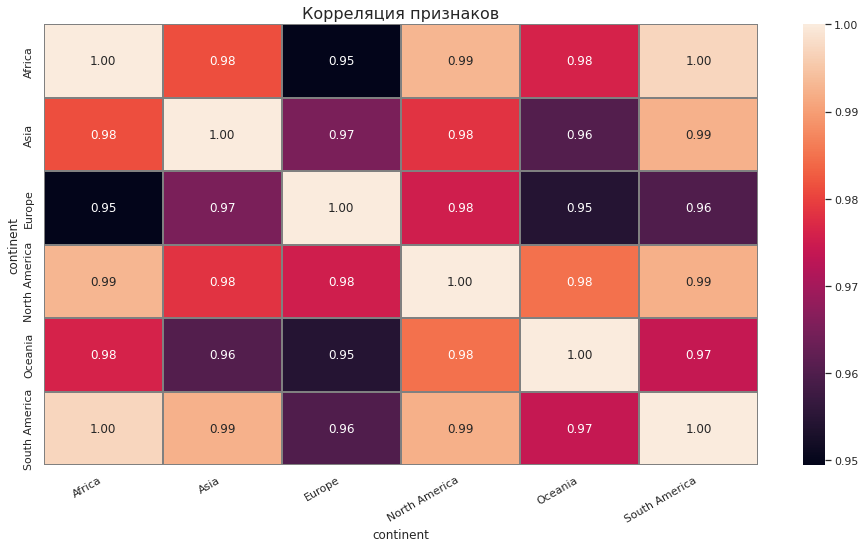

In [17]:
data_1_cut_corr = data_1.corr()
draw_chart(data_1_cut_corr, kind='heatmap',title='Корреляция признаков', fmt='.2f');

In [18]:
data_1_cut_corr.mean(axis=1).to_frame().reset_index().groupby('continent').agg({0:'mean'})\
                                       .reset_index().sort_values(by=0, ascending = False).reset_index(drop=True)\
                                       .rename(columns=({0:'corr'}))

,continent,corr
0,North America,0.987310
1,South America,0.985962
2,Africa,0.982837
3,Asia,0.979601
4,Oceania,0.974979
5,Europe,0.967446


ВЫВОД: **Меньше всего с другими частями света коррелирует Европа**